In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

def parse_data():
    parsed_data = []
    with open('iris.csv', 'r') as f:
        for raw_line in f:
            line = raw_line.split(',')
            parsed_data.append([float(line[0]), float(line[1]), float(line[2]), float(line[3]), line[4].strip()])
    return parsed_data


def euclidian_distance(x: list, y: list) -> float:
    result = 0
    for x_element, y_element in zip(x, y):
        result = result + (x_element - y_element) ** 2
    return math.sqrt(result)


def nn(item: list, data: list) -> tuple:
    min_value = float('inf')
    category = None

    for pattern in data:
        distance = euclidian_distance(item, pattern[:4])
        if distance < min_value:
            min_value = distance
            category = pattern[-1]
    return min_value, category,


def error_test(test_data: list, validation_data: list) -> float:
    errors = 0
    for item in test_data:
        distance, category = nn(item[:4], validation_data)
        if category != item[-1]:
            errors += 1
    return 100 * float(errors) / len(test_data)


def vector_norm(vector: list) -> float:
    res = 0
    for x in vector:
        res += x ** 2
    return math.sqrt(res)


def angle_between_vectors(vector1: list, vector2: list) -> float:
    dot_product = np.dot(vector1, vector2)
    norm1 = vector_norm(vector1)
    norm2 = vector_norm(vector2)

    res = dot_product / (norm1 * norm2)

    if math.fabs(res) > 1:
        res = res / math.fabs(res)
    return math.acos(res)


def count_params(data: list) -> list:
    unit = np.ones(4)
    labels = {
        'Iris-virginica': 'red',
        'Iris-setosa': 'green',
        'Iris-versicolor': 'blue'
    }
    result = []
    for row in data:
        norm = vector_norm(row[:4])
        angle = angle_between_vectors(unit, row[:4])
        color = labels[row[-1]]

        result.append([norm, angle, color])
    return result


def knn(item: list, data: list, k: int) -> list:
    ndata = data[:]
    kList = []

    for j in range(k):
        i = 0
        index = 0
        min_value = float('inf')
        category = 'unknown'
        for pattern in ndata:
            res = euclidian_distance(item, pattern[:4])
            if res < min_value:
                min_value = res
                category = pattern[-1]
                index = i
            i += 1
        kList.append([min_value, category])
        del ndata[index]
    labels = [x[1] for x in kList]
    counts = Counter(labels)
    inverse = [(value, key) for key, value in counts.items()]
    return max(inverse)[1]

parsed_data = parse_data()
visual_data = count_params(parsed_data)

test_data_1 = parsed_data[:10] + parsed_data[50:60] + parsed_data[100:110]
validated_data_1 = parsed_data[10:50] + parsed_data[60:100] + parsed_data[110:]
print("nn_error_test_1: %s" % error_test(test_data_1, validated_data_1))

test_data_2 = parsed_data[40:50] + parsed_data[90:100] + parsed_data[140:150]
validated_data_2 = parsed_data[:40] + parsed_data[50:90] + parsed_data[100:140]
print("nn_error_test_2: %s" % error_test(test_data_2, validated_data_2))

print("knn: %s" % knn(parsed_data[10][:4], parsed_data[12:], 3))

print("angle_between_vectors: %s" % angle_between_vectors([0, 0, 1], [1, 0, 0]))
print("vector_norm: %s" % vector_norm([1, 1, 1, 1]))
print("count_params: %s" % visual_data[:1])


FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

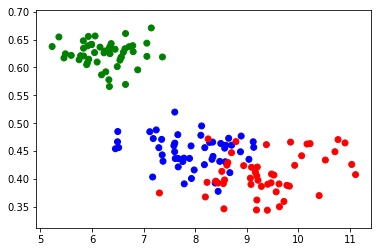

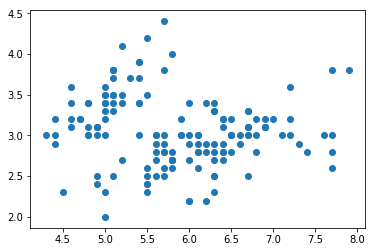

In [59]:
# Rysunki
x = list(zip(*visual_data))[0]
y = list(zip(*visual_data))[1]
colors = list(zip(*visual_data))[2]

plt.scatter(x, y, color=colors)
plt.show()
x = list(zip(*parsed_data))[0]
y = list(zip(*parsed_data))[1]

plt.scatter(x, y)
plt.show()


[-2.684207125103951, 0.3266073147643875, -0.021511837001962686, 0.0010061572415419606, 'Iris-setosa']
[-2.684207125103951, 0.3266073147643875, 0, 0, 'Iris-setosa']
nn_error_test_3: 3.3333333333333335
knn: Iris-setosa


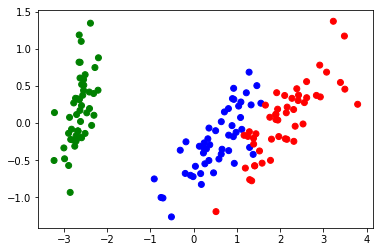

In [49]:
parsed_pca_data = new_data.tolist()
parsed_pca_data_stripped = new_data.tolist()

for i in range(len(parsed_pca_data)):
    parsed_pca_data[i].append(parsed_data[i][4])
    parsed_pca_data_stripped[i].append(parsed_data[i][4])
    parsed_pca_data_stripped[i][3] = 0
    parsed_pca_data_stripped[i][2] = 0
    
print(parsed_pca_data[0])
print(parsed_pca_data_stripped[0])

test_data_3 = parsed_pca_data_stripped[:10] + parsed_pca_data_stripped[50:60] + parsed_pca_data_stripped[100:110]
validated_data_3 = parsed_pca_data_stripped[10:50] + parsed_pca_data_stripped[60:100] + parsed_pca_data_stripped[110:]
print("nn_error_test_3: %s" % error_test(test_data_3, validated_data_3))
print("knn: %s" % knn(parsed_pca_data_stripped[10][:4], parsed_pca_data_stripped[12:], 3))

# Rysunki
x = list(zip(*parsed_pca_data_stripped))[0]
y = list(zip(*parsed_pca_data_stripped))[1]

plt.scatter(x, y, color=colors)
plt.show()